<a href="https://colab.research.google.com/github/sysyJEON/class_ai4ml/blob/main/ml_guide/ch06_Dimension_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6장 차원 축소

## 6.1 차원 축소(Dimension Reduction) 개요

차원 축소: 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
- 피처 선택(feature selection)
  - 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내주는 중요 피처로 압축해서 추출하는 것
  - 새롭게 추출된 중요 특성은 기존의 피처가 압축된 것이므로 기존의 피처와는 완전히 다른 값
- 피처 추출(feature extraction)
  - 기존 피처를 단순 압축이 아닌, 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것

## 6.2 PCA(Principal Component Analysis)

### PCA 개요

PCA는 가장 대표적인 차워 축소 기법
- 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Component)을 추출해 차원을 축소하는 기법
- 기존 데이터의 정보 유실이 최소화
- 가장 높은 분산응ㄹ 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데, 이것이 PCA의 중성분이 됨
- 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주

(1) 가장 큰 데이터 변동성(Variance)을 기반으로 첫 번째 벡터 축을 생성   
(2) 이 벡터 축에 직각이 되는 벡터(직교 벡터)를 축으로   
(3) 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 축을 생성  
-> 이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소됨

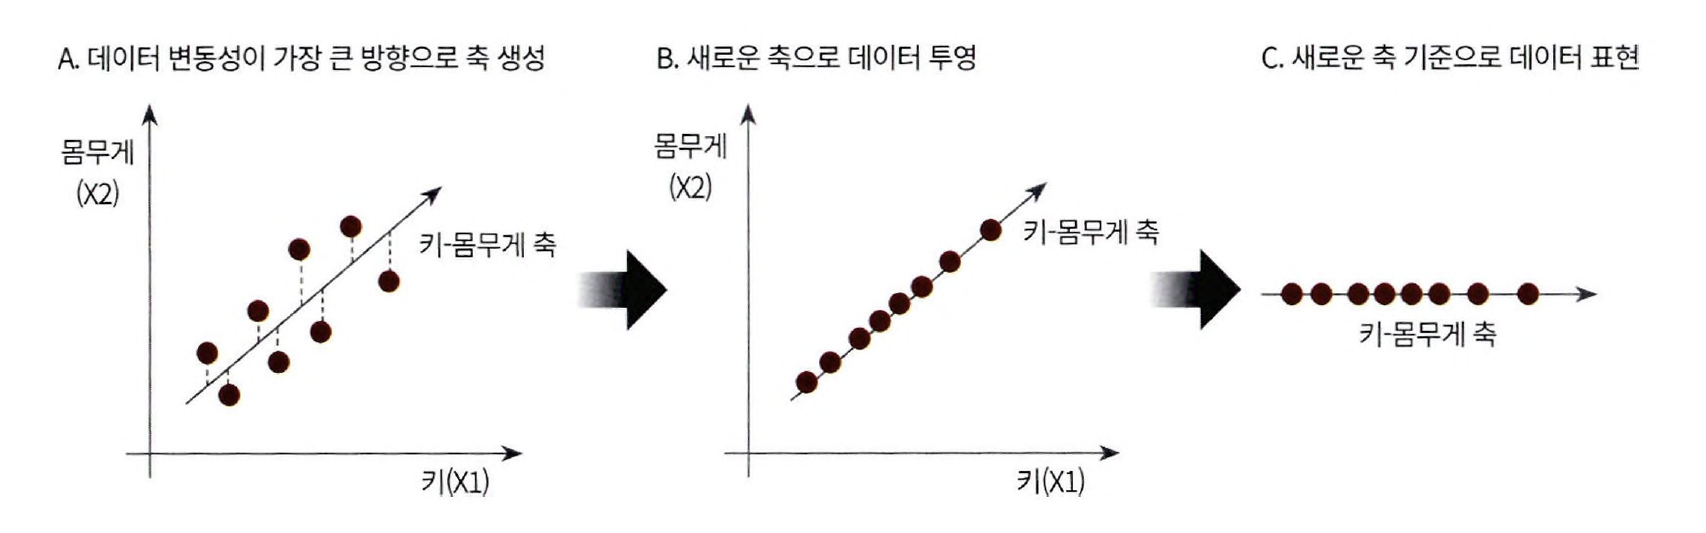

선형대수 관점에서의 PCA
- 입력 데이터의 공분산 행렬(Covariance Matrix)을 고유값 분해하고, 이렇게 구한 고유벡터에 입력 데이터를 선형 변환한 것
- 고유벡터: PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타냄
- 고유값(eigenvalue): 고유벡터의 크기, 입력 데이터의 분산을 나타냄

선형 변환
- 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것
- 특정 벡터를 하나의 공간에서 다른 공간으로 투영하는 개념(행렬을 공간으로 가정)

고유벡터
- 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터
- Ax = ax (A는 행렬, x는 고유벡터, a는 스칼라값)
- 고유벡터는 여러 개 존재하며, 정방 행렬은 최대 그 차원 수만큼의 고유벡터를 가질 수 있음
- 고유벡터는 행렬이 작용하는 힘의 방향과 관계가 있어 행렬을 분해하는 데 사용됨

공분산 행렬
- 공분산: 두 변수 간의 변동
- 공분산 행렬: 여러 변수와 관련된 공분산을 포함하는 정방형 행렬
- 정방행렬(Square Matrix), 대칭행렬(Symmetric Matrix)임
- 대칭행렬은 항상 고유벡터를 직교행렬(orthogonal matrix)로, 고유값을 정방 행렬로 대각화할 수 있음
- 공분산 C는 고유벡터 직교 행렬 * 고유값 정방 행렬 * 고유벡터 직교 행렬의 전치 행렬로 분해됨


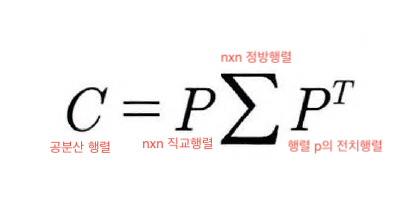

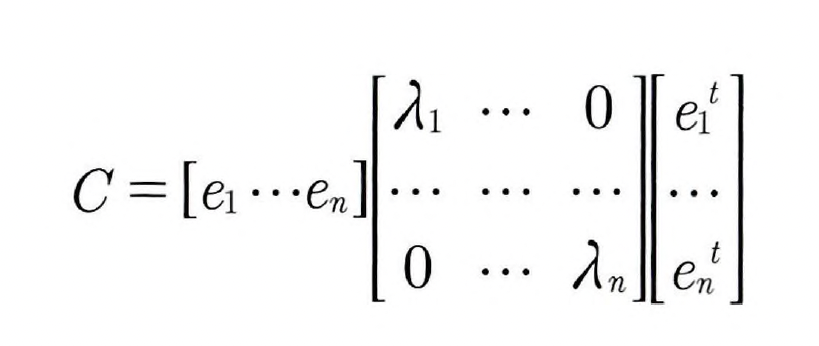

** 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA라는 것이다.**
- 1. 입력 데이터 세트의 공분산 행렬 생성
- 2. 공분산 행렬의 고유벡터와 고유값 계산
- 3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터를 추출
- 4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

### 붓꽃(Iris) 데이터 세트 PCA 변환

- sepal length, sepal width, petal lenth, petal width 4개 속성으로 되어 있음
- 4개의 속성을 2개의 PCA 차원으로 압축해 원래 데이터 세트와 압축된 데이터 세트가 어떻게 달라졌는지 확인

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


원본 붓꽃 데이터 세트 분포 확인
- 2차원으로 시각화
- 두 개의 속성인 sepal lenth, sepal width를 X축, Y축으로

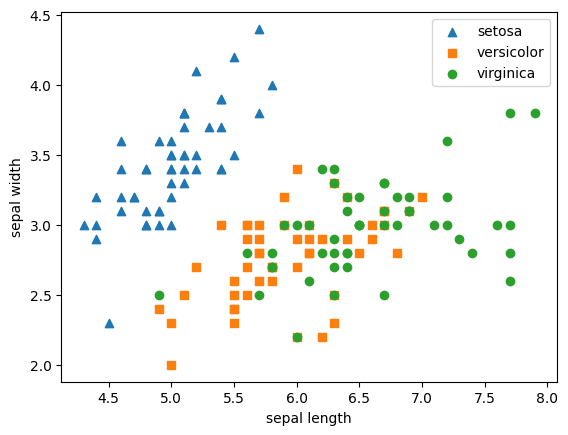

In [2]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

- setosa는 구분이 되지만 versicolor와 virginica는 분류가 어려움

붓꽃 데이터 세트에 바로 PCA를 적용하기 전에 개별 속성을 함께 스케일링해야 함
- 각 속성값을 동일한 스케일로 변환

In [3]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

스케일링 적용된 데이터 세트에 PCA 적용해 4차원을 2차원으로 변환

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # n_components: PCA로 변환할 차원의 수

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [5]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


2개의 속성으로 PCA 변환된 데이터 세트를 2차원상에서 시각화

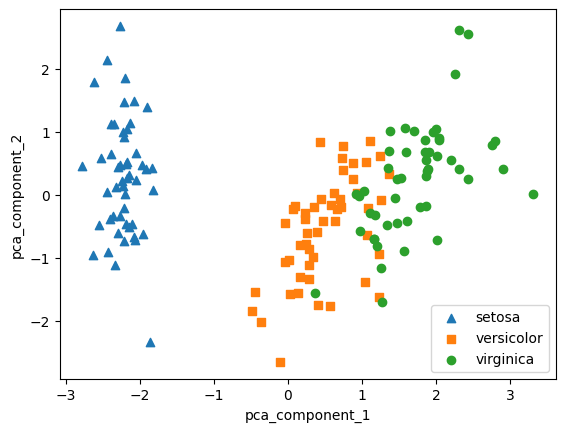

In [6]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행.
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

- setosa는 명확히 구분 가능
- versicolor와 virginica 서로 겹치는 부분 일부 존재하지만 비교적 잘 구분됨
- pca_component_1이 원본 데이터의 변동성을 잘 반영했기 때문

PCA Component별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 알아보기
- PCA 변환을 수행한 PCA 객체의 explained_varianc_ratio 속성: 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율 제공

In [7]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


- pca_component_1은 전체 변동성의 약 72.9% 차지
- pca_component_2는 전체 변동성의 약 22.8% 차지
- 따라서 PCA를 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 설명할 수 있다.

원본 붓꽃 데이터 세트와 PCA로 변화된 데이터 세트에 각각 분류를 적용한 후 결과 비교
- estimator: RandomForestClassifier
- cross_val_score() 3개의 교차 검증 세트로 정확도 결과 비교

원본 붓꽃 데이터

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


PCA 변환된 데이터

In [9]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


- 원본 데이터 대비 약 8% 하락
- 비교적 큰 성능 수치의 감소지만, 4개의 속성이 2개로, 속성 개수가 50% 감소한 것을 고려한다면 PCA 변환 후에도 원본 데이터의 특성을 상당 부분 유지하고 있음

### 신용카드 고객 데이터 세트 PCA 변환

http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/데이터/pca_credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


- 30000개의 레코드와 24개의 속성
- PAY_0 다음에 PAY_2 칼럼이 있으므로 PAY_0을 PAY_1로 칼럼명 변환
- 'default payment next month'(다음달 연체 여부) 속성이 Target 값, 'default'로 칼럼명 변환
- 연체: 1, 정상납부: 0
- Target 속성인 'default' 칼럼을 y_target 변수로 별도 저장하고 피처 데이터는 default 칼럼을 제외한 별도의 데이터프레임으로


In [12]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

In [13]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

23개의 속성 데이터 세트가 있으나 각 속성끼리 상관도가 매우 높음
- corr() 이용해 각 속성 간의 상관도 구한 뒤 시본의 heatmap으로 시각화

<Axes: >

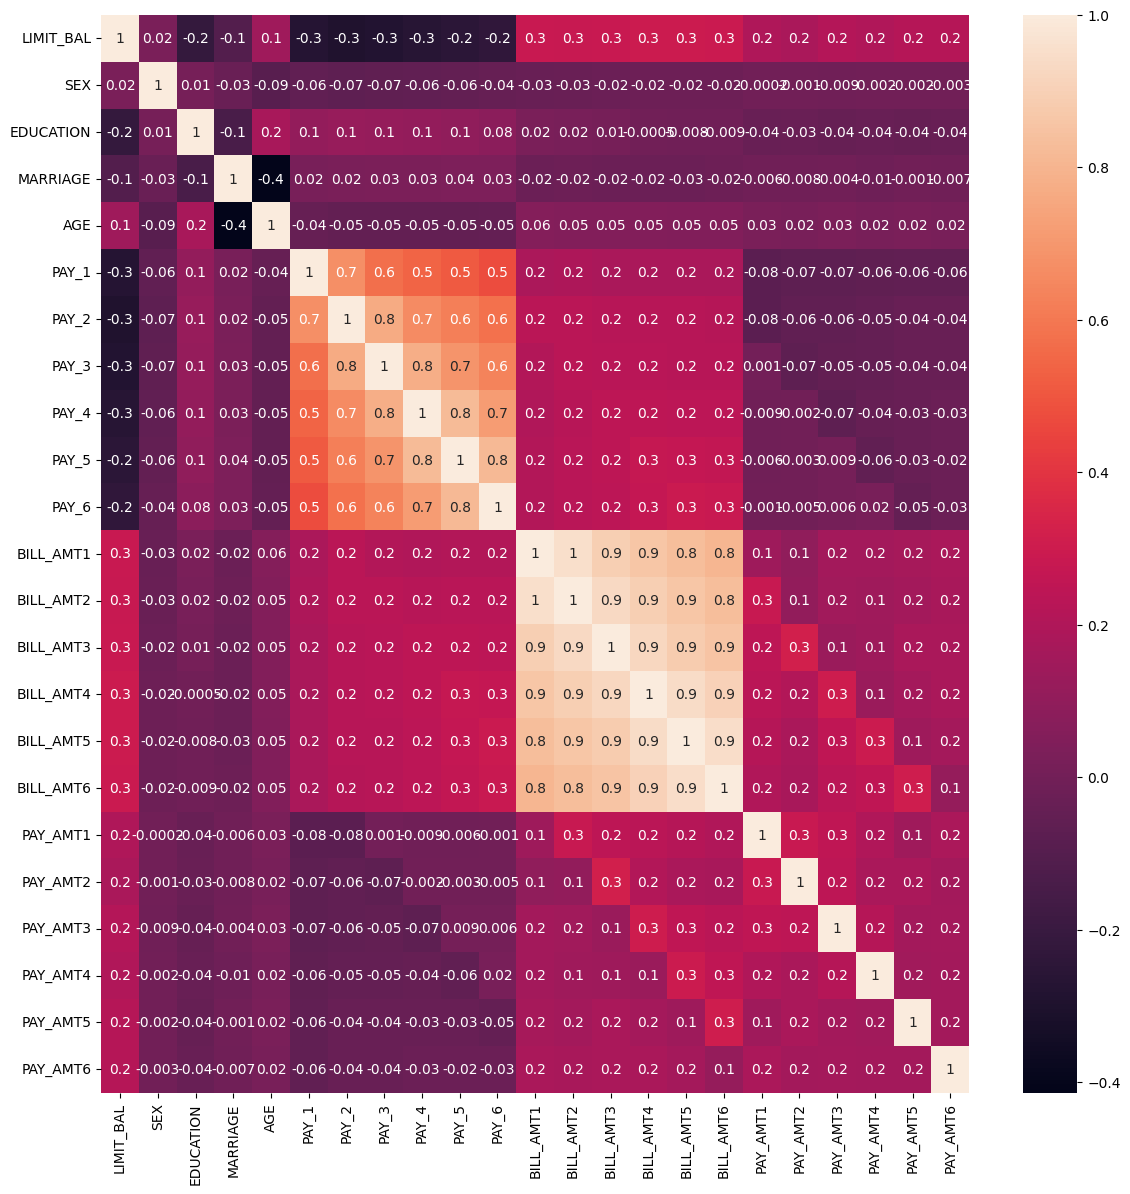

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')


- BILL_AMT1 ~ BILL_AMT6 6개 속성끼리의 상관도가 대부분 0.9 이상으로 매우 높음
- PAY_1 ~ PAY_6 또한 역시 높음
- 이렇게 높은 상관도를 가진 속성들은 소수의 PCA만으로도 자연스럽게 이 속성들의 변동성을 수용할 수 있음

BILL_AMT1 ~ BILL_AMT6 6개 속성을 2개의 컴포넌트로 PCA 변환한 뒤 개별 컴포넌트의 변동성을 explained_variance_ratio 속성으로 알아보기

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
cols_pay = ['PAY_' + str(i) for i in range(1, 7)]
cols_amt = ['PAY_AMT' + str(i) for i in range(1, 7)]
print(cols_bill)
cols_bill.extend(cols_pay)
cols_bill.extend(cols_amt)
print('대상 속성명:',cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
X_features.loc[:, cols_bill] = df_cols_scaled
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
PCA Component별 변동성: [0.36180187 0.20618472]


<ipython-input-15-d822e1362a02>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.64250107 -0.65921875 -0.29855966 ... -0.64722711 -0.71798186
 -0.04473888]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_features.loc[:, cols_bill] = df_cols_scaled
<ipython-input-15-d822e1362a02>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.64739923 -0.66674657 -0.49389911 ... -0.64383044  0.41026929
 -0.00385085]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_features.loc[:, cols_bill] = df_cols_scaled
<ipython-input-15-d822e1362a02>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.66799331 -0.63925429 -0.48240819 ... -0.63815838  0.42237335
  0.03966713]' has dtype incompatible with 

- 엥? 왜 작게 나오지?
- 교재에는 [0.90555253, 0.0509867]로 나와서 2개의 컴포넌트만으로 6개의 속성의 변동성을 약 95% 이상 설명할 수 있다고 함

원본 데이터 세트와 PCA 변환 데이터 세트의 분류 예측 결과 비교

In [16]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))


CV=3 인 경우의 개별 Fold세트별 정확도: [0.8081 0.8197 0.8232]
평균 정확도:0.8170


In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행.
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7913 0.7972 0.802 ]
PCA 변환 데이터 셋 평균 정확도:0.7968


- 전체 23개 속성의 약 1/4 수준인 6개의 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측 결과보다 약 1~2% 정도의 예측 성능 저하만 발생

## 6.3 LDA(Linear Discrimminant Analysis)

### LDA 개요

LDA: 선형 판별 분석법
- PCA는 입력 데이터의 변동성의 가장 큰 축을 찾았지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는다.
- 클래스 간 분산(between-class-scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식으로 차원을 축소함
- 클래스 간 분산은 최대한 크게, 클래스 내부의 분산은 최대한 작게
- 공분산 행렬이 아니라 클래스 간 분산과 클래스 내부 분산 행렬을 생성한 뒤, 이 행렬에 기반해 고유벡터를 구하고 입력 데이터를 투영함

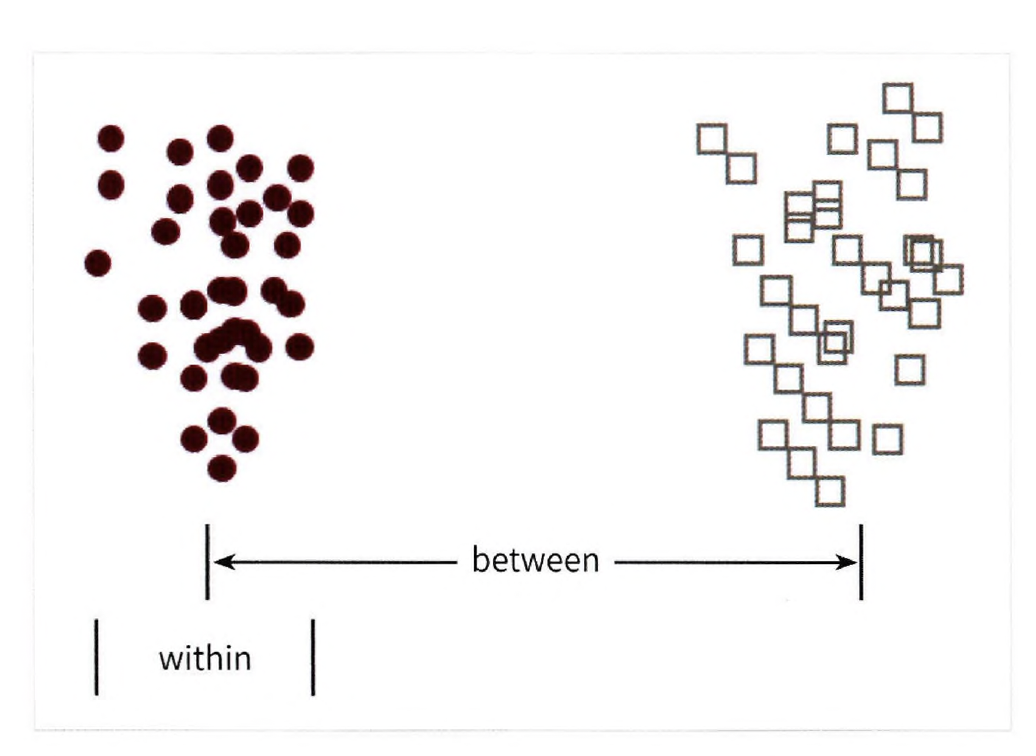

LDA 구하는 스텝
- 1. 클래스 내부와 클래스 간 분산 행렬 구함. 이 두 개의 행렬은 입력 데이터의 **결정 값** 클래스별로 개별 피처의 평균 벡터(mean vector)를 기반으로 구함.
- 2. 클래스 내부 분산 행렬을 Sw, 클래스 간 분산행렬을 SB라고 하면 다음 식으로 두 행렬을 고유벡터로 분해할 수 있다.

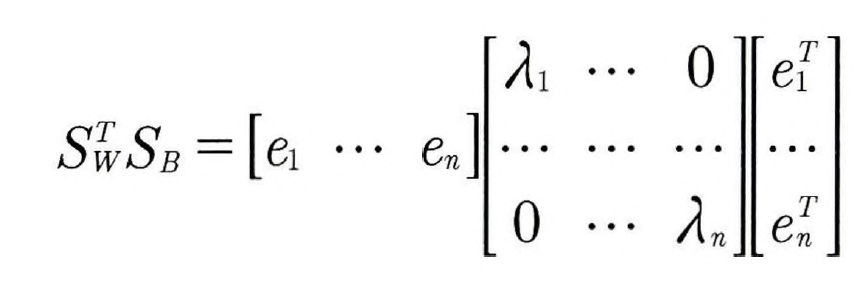

- 3. 고유값이 가장 큰 순으로 K개(LDA 변혼 차수만큼) 추출
- 4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

### 붓꽃 데이터 세트에 LDA 적용하기

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

2개의 컴포넌트로 붓꽃 데이터를 LDA 변환
- PCA와 달리 LDA는 비지도학습이 아닌 지도학습
- 클래스의 결정 값이 변환시에 필요

In [19]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target) # 결정값이 입력되어야 함
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


LDA 변환된 입력 데이터 값을 2차원 평면에 품종별로 표현

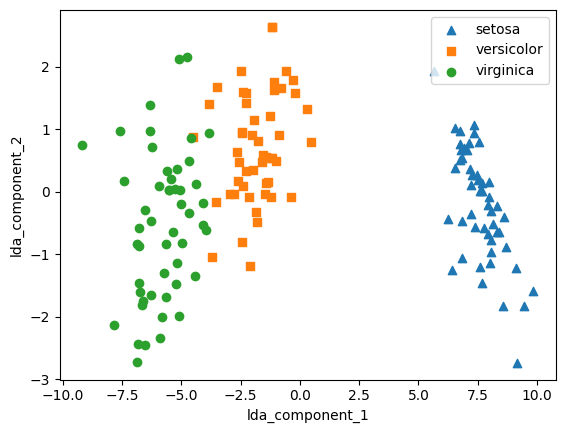

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()


## 6.4 SVD(Singular Value Decomposition)

### SVD 개요

PCA는 정방행렬만을 고유벡터로 분해할 수 있지만, SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용 가능
- SVD는 m x n 크기의 행렬 A를 다음과 같이 분해하는 것을 의미함

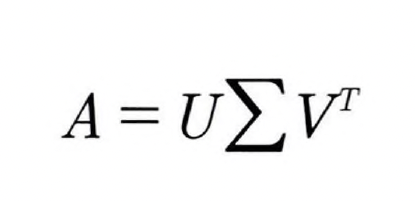

- SVD: 특이값 분해
- 행렬 U와 V에 속한 벡터: 특이벡터(singular vector)
- Σ: 대각행렬. 0이 아닌 값이 행렬 A의 특이값
- SVD는 A의 차원이 mxn일 때 U의 차원이 mxm, Σ 차원이 mxn, VT의 차원이 nxn으로 분해

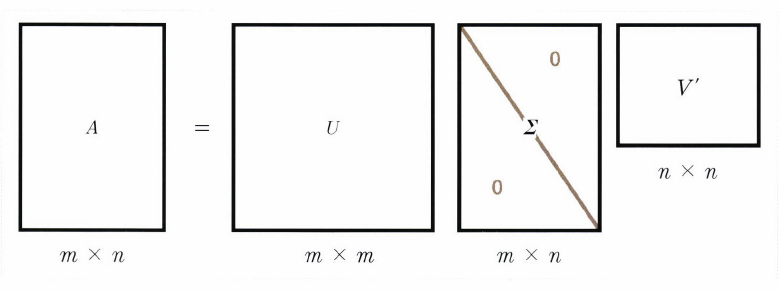

- Σ의 비대각인 부분과 대각원소 중에 특이값이 0인 부분 모두 제거
- 제거된 Σ에 대응되는 U와 V 원소도 함께 제거해 차원 줄인 형태로 SVD 적용
- 적용 결과 A의 차원이 mxn, U의 차원을 mxp, Σ의 차원을 pxp, VT의 차원을 pxn으로 분해

Truncated SVD는 Σ의 대각원소 중에 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해하는 것

### 넘파이의 SVD를 이용해 SVD 연산 수행

In [21]:
# numpy의 svd 모듈 import
import numpy as np
from numpy.linalg import svd  # 넘파이의 SVD 모듈

# 4X4 Random 행렬 a 생성 <- 행렬의 개별 로우끼리의 의존성 없애기 위해
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


a 행렬에 SVD 적용해 U, Sigma, Vt 도출

In [22]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


- Sigma 행렬의 경우 행렬의 대각에 위치한 값만 0이 아니기 때문에 1차원 행렬로 표현

분해된 U, Sigma, Vt를 이용해 다시 원본 행렬로 정확히 복원되는지 확인
- 복원은 U, Sigma, Vt를 내적
- Sigma 경우 0이 아닌 값만 1차원으로 추출했으므로 다시 0을 포함한 대칭행렬로 변환한 뒤 내적을 수행해야 함

In [23]:
# Sima를 다시 0 을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


- 원본 행렬 a와 동일하게 복원됨

데이터 세트가 로우 간 의존성이 있을 경우
- 어떻게 Sigma 값이 변하고
- 이에 따른 차원 축소가 진행되는지 알아봄

의존성 부여하기 위해
- a 행렬의 3번째 로우를 1st+2nd
- 4th = 1st

In [24]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [25]:
# 다시 SVD를 수행하여 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


- Sigma 값 중 2개가 0
- 선형 독립인 로우 벡터의 개수가 2개
- 행렬의 랭크(Rank)가 2

분해된 U, Sigma, Vt를 이용해 다시 원본 행렬로 복원
- Sigma의 0에 대응되는 U, Sigma, Vt 데이터를 제외하고 복원

In [26]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


Truncated SVD를 이용해 행렬 분해
- Σ행렬의 대각원소(특이값) 중 상위 일부 데이터만 추출해 분해하는 방식
더 작은 차원의 U, Σ, VT로 분해하기 때문에 원본 행렬을 정확하게 다시 복원할 수 없음
- 데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본 행렬을 근사할 수 있음

In [27]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인
np.random.seed(121)
matrix = np.random.random((6, 6)) # 6x6 원본 행렬
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False) # normal svd로 분해
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행.
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

- Truncated SVD로 분해된 행렬로 다시 복원할 경우 완벽하게 복원되지 않고 근사적으로 복원됨

### 사이킷런 TruncatedSVD 클래스를 이용한 변환

- 사이킷런의 `TruncatedSVD` 클래스는 사이파이의 `svds`와 같이 Truncated SVD 연산을 수행해 원본 행렬을 분해한 U, Sigma, Vt 행렬을 반환하지 않는다.
- PCA 클래스와 유사하게 `fit()`와 `transform()`을 호출해 원본 데이터를 몇 개의 주요 컴포넌트로 차원을 축소해 변환함
- 원본 데이터를 Truncated SVD 방식으로 분해된 U*Sigma 행렬에 선형 변환해 생성

Text(0, 0.5, 'TruncatedSVD Component 2')

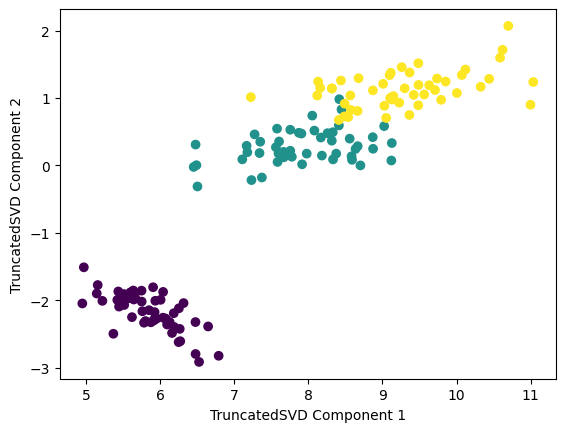

In [28]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

- 품종별로 어느 정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가지고 있음

TruncatedSVD와 PCA 클래스 구현 결과 거의 동일
- 두 클래스 모두 SVD를 이용해 행렬을 분해하기 때문

Text(0.5, 1.0, 'PCA Transformed')

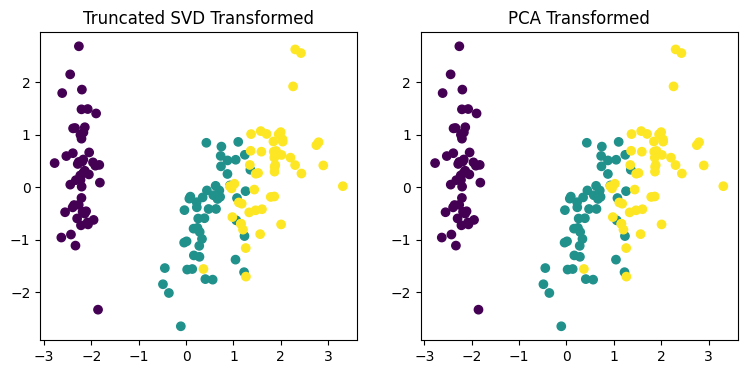

In [29]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

- 시각화 결과 거의 동일

두 개의 변환 행렬 값과 원본 속성별 컴포넌트 비율값 비교

In [30]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.3390953525955403e-15
-7.632783294297951e-17


- 모두 0에 가까운 값이므로 2개의 변환이 서로 동일함
- 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행

## 6.5 NMF(Non-Negative Matrix Factorization)

### NMF 개요

-Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형
- 원본 행렬 내의 모든 원소 값이 모두 양수라는 게 보장되면 다음과 같이 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법

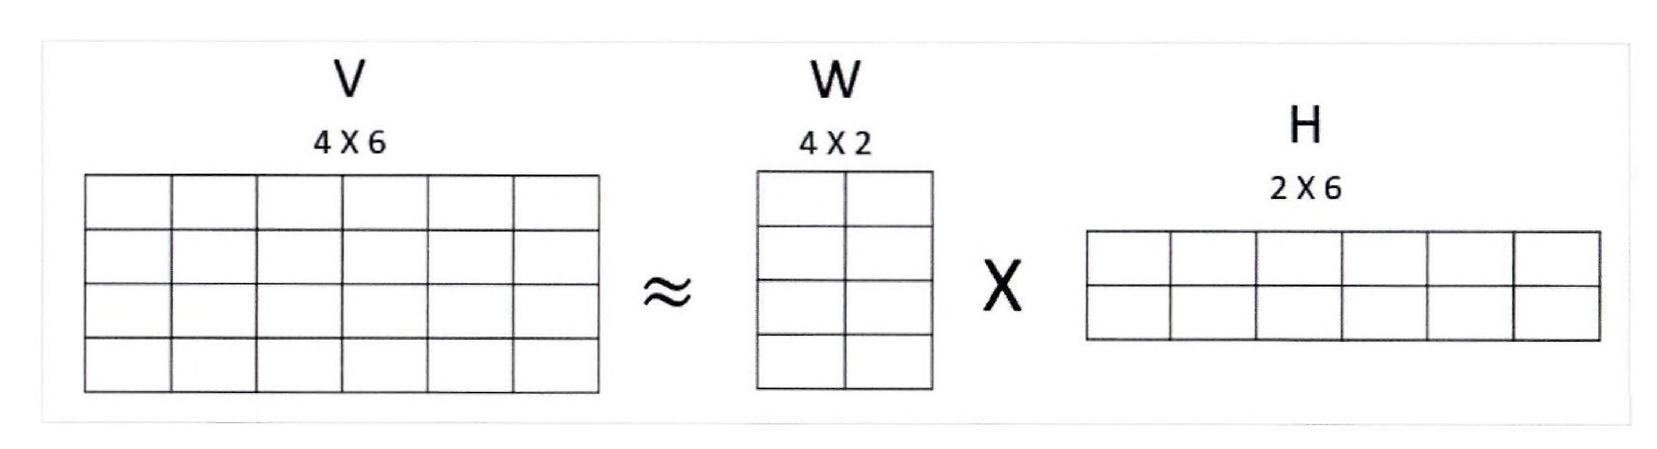

- 4x6 원본 행렬 V는 4x2 행렬 W와 2x6 행렬 H로 근사해 분해됨
- 분해된 행렬은 잠재 요소를 특성으로 가지게 됨
- 분해 행렬 W는 원본 행에 대해서 이 잠재 요소의 값이 얼마나 되는지에 대응
- 분해 행렬 H는 원본 열에 대해서 이 잠재 요소의 값이 얼마나 되는지에 대응

붓꽃 데이터를 NMF 이용해 2개의 컴포넌트로 변환하고 시각화

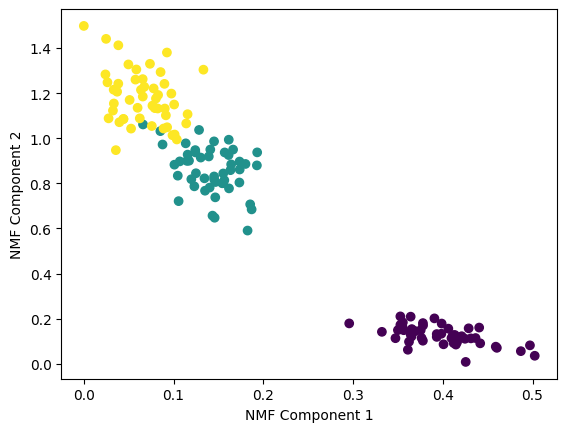

In [32]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

plt.show()
